# Jupyter Notebooks
## What they are, how they can be used, how they are supported by e-Infra CZ

### Aleš Křenek, Petr Pospíšil and Jiří Vorel
### CESNET e-Infrastructure Conference, April 2021


# Warm-up question

Let's try Zoom poll


# Jupyter Notebook is ...

"... an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text." (http://jupyter.org/)

Like this presentation

In [3]:
from time import sleep
def run_deep_thought ():
# XXX: uncomment for production run
#    sleep(7.5e6 * 365 * 24 * 3600)
#    return 42
    sleep(1)
    return 41

print("The answer to the ultimate question of life, universe, and everything is ... ",
     run_deep_thought())

The answer to the ultimate question of life, universe, and everything is ...  41


# Major usecase types

### Personal
- Just for myself, to keep things organized, computations reproducible etc.

### Share
- With colleagues in the lab, students, ... 
- Document processes, exchange ideas, merge code and documentation

### Publish
- Supplementary material to journal papers -- detailed documentation and implementation in one
- Lecture material -- convenient way of mixing standard slides and live examples in one stream

# Personal use

### Real experience few years ago
- got an idea to solve particular problem during a conference
- experimental code overnight, working prototype in a week


- after a month of catching up with administrative duties...
- what the folders and scripts are, how they should be executed?
![](bigmess.png)

### "Notebook" in the literal sense
Make notes on your ideas, together with the code to implement them

Let's start with my "experimental" data file ...

In [6]:
import numpy as np
import matplotlib.pyplot as plt

d=np.loadtxt('mydata.txt')
t = d.T[0]
xx = np.delete(d,0,axis=1)

And visualize the data inline

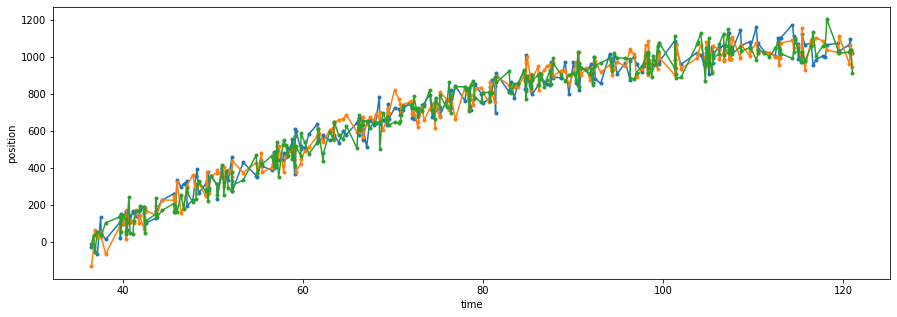

In [22]:
plt.figure(figsize=(15,5))
plt.plot(t,xx[:,0],marker='.')
plt.plot(t,xx[:,2],marker='.')
plt.plot(t,xx[:,4],marker='.')
plt.xlabel('time')
plt.ylabel('position')
plt.show()

### Is it a quadratic curve?
Fit the model

In [19]:
from scipy import stats,linalg
samples,repeats = xx.shape
sample_mean = np.sum(xx,axis=1)/repeats
t2 = t**2
ones = np.full(t.shape,1.)
A = np.stack((t2,t,ones),axis=1)
Arep = np.tile(A,(repeats,1))
bflat = np.reshape(xx,samples*repeats,order='F')
par,_,_,_ = linalg.lstsq(Arep,bflat)
mod = (lambda x,a,b,c: a*x*x+b*x+c)(t,*par)

And compute the lack-of-fit statistical test

In [24]:
lack = repeats*np.sum((mod-sample_mean)**2)
m = np.tile(np.reshape(sample_mean,(samples,1)),repeats)
pure = np.sum((xx-m)**2)
d1 = samples-3
d2 = samples*repeats-repeats
f2test = (lack/d1) / (pure/d2)
print("p-value = ", 1.-stats.f.cdf(f2test,d1,d2))

p-value =  0.007221272483570185


### I get all this in one place
- initial "by eye" analysis of the sample of the data
- recorded hypothesis on the data characteristics 
  - is it quadratic?
- verification of the hypothesis
  - I did the f-test on lack of fit of quadratic curve
  - I know **exactly** how I did it
  - the result is here too
- everything ready to be reused easily 
  - e.g. use another model

# Share

### Petr Pospíšil

More elaborated example, based on real research case



# Publish

- **Supplementary material** to journal papers 
  - just more verbose than the previous example
- **Demo services**
  - let your users (or paper reviewers) check your code alive
  - shown later in this talk
- **Lectures**
  - this very talk :-)

# How to run Jupyter notebooks

## On your laptop/desktop machine directly

### Install the python packages from standard repository

<pre>
$ pip install jupyter
...
$ jupyter notebook
</pre>
    
Opens a browser window, ready to run and create notebooks

## On your laptop/desktop in Docker

- Docker is available on virtually all operating systems
- Advantage of isolated environment
    - reproducible, strict control of package versions etc.
    - **can be scratched when anything goes wrong**
- Example Dockerfile (to run this notebook, no presentation extensions for clarity)
<pre>
FROM ubuntu:18.04
MAINTAINER Ales Krenek &lt;ljocha@ics.muni.cz&gt;
RUN apt install -y python3-pip
RUN pip3 install jupyter
RUN pip3 install matplotlib
RUN pip3 install scipy
WORKDIR &#47;work
ENV HOME &#47;work
CMD jupyter notebook --ip 0.0.0.0 --port 8888
</pre>


Build it (where the Dockerfile is)

    $ docker build -t ljocha/myjupyter .

And run in a directory where notebooks and data reside:

    $ docker run -ti -u $(id -u) -v $PWD:/work -p 8888:8888 ljocha/myjupyter

### Pros and contras
- works offline (+)
- limited resources (-)
- manual sharing, data management (-)
- backup (-)

## Jupyter Hub

"A multi-user version of the notebook designed for companies, classrooms and research labs" (http://jupyter.org/)

### Metacentrum standard installation

http://jupyter.cloud.metacentrum.cz/

Run notebook as PBS job, access to most Metacentrum clusters and storage
- store notebooks on /storage/xxx (backups, sharing, ...)
- direct and full-speed access to data there, no need to copy around, large datasets feasible ...

**See demonstration**



## Jupyter Hub

### Experimental CERIT-SC installation over Kubernetes

http://hub.cerit-sc.cz/

More progressive technology, runs in Docker, supports custom images

# Advanced use

- Some computational parts of a notebook use large software packages 
  - run these steps on more powerful hardware (more cores, memory, GPUs, ...)
  - isolate those packages, use multiple versions, ...

- Kubernetes example
  - spawn a notebook from custom Docker image
  - attach proper input interface (DNS name, certificate, ...)
  - create persistent shared disk volume
  - run Gromacs computations in additional containers, using more cores and GPU
  - *live demonstration of experimental service -- don't blame me if things go wrong*
  


- Refer to complete source code of real applications
  - https://github.com/ljocha/chicken-and-egg
  - https://gitlab.ics.muni.cz/3086/gromacs-plumed-docker (used by the above)
  - https://gitlab.ics.muni.cz/467814/magicforcefield-pipeline (even more complex)
  
- CERIT-SC Kubernetes endpoint and docs
  - https://rancher.cerit-sc.cz/
  - https://cerit-sc.github.io/kube-docs/

# This is not the whole story

### Jupyter notebook needn't be Python only
* many *kernels* are available (R, Julia, C++, ...)

### Further environments to run notebooks
* Binder https://jupyter.org/binder (integrate with git repos)
* JypyterLab https://jupyter.org/try

### Specific infrastructure support
* EGI Notebooks https://notebooks.egi.eu/hub/

# Summary

### Jupyter Notebooks are cool
* mix implementation of your computational workflow with its description
* share it with your frieds or publicly
* make it reproducible

### Even compex scenarios are achievable
* install less common, non default packages
* freeze your environment in Docker container images for strict reproducibility
* use multiple containers to compose your workflow
  * isolate possibly interfering software packages
  * use specific resource allocation (GPU, large RAM, many cores, ...)
  
### Metacentrum and CERIT-SC provide specific support


# Acknowledgements

### Vojtěch Nikl
* http://jupyter.cloud.metacentrum.cz/

### Viktória Spišaková, Lukáš Hejtmánek
* http://hub.cerit-sc.cz/ and Kubernetes infrastructure behind it

### Vladimír Višňovský
* prototype implementation of the complex "notebook in K8s" usecase

### Vojtěch Spiwok, Jana Hozzová
* driving application usecases